# **Hypothesis:** 
Students who had computer programming experience in the past will find the 
course to be easier than those who have not. 

In [ ]:
%reload_ext autoreload
%autoreload 2

import matplotlib

print("Auto_Reload imported!")

Auto_Reload imported!


To begin, I thought it would be a step in the right direction to read the data at
hand. So, I first created a variable to define the data, then ran read_csv_rows on it. 

In [2]:
DATA_DIRECTORY = "../../data"
DATA_FILE_PATH = f"{DATA_DIRECTORY}/survey.csv"

from data_utils import read_csv_rows

read_data: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
read_csv_rows(DATA_FILE_PATH)

[{'row_number': '0',
  'year': '23',
  'unc_status': 'Returning UNC Student',
  'comp_major': 'No',
  'primary_major': 'Advertising and Public Relations',
  'data_science': 'No',
  'prereqs': 'MATH 129P, MATH 130',
  'prior_exp': 'None to less than one month!',
  'AP_Principles': '',
  'AP_A': '',
  'other_comp': '',
  'prior_time': '',
  'languages': '',
  'section': 'In-Person',
  'in_person_classes': '',
  'hours_online_social': '3 to 5 hours',
  'hours_online_work': '3 to 5 hours',
  'lesson_time': '5',
  'sync_perf': '2',
  'all_sync': '2',
  'own_notes': '4',
  'own_examples': '2',
  'oh_visits': '2',
  'ls_effective': '7',
  'lsqs_effective': '6',
  'programming_effective': '6',
  'qz_effective': '5',
  'oh_effective': '5',
  'tutoring_effective': '',
  'kaki_effective': '3',
  'pace': '5',
  'difficulty': '5',
  'understanding': '4',
  'interesting': '5',
  'valuable': '6',
  'would_recommend': '7'},
 {'row_number': '1',
  'year': '24',
  'unc_status': 'Returning UNC Student',


Having this list is great and all, but it's far from a solution. To find an answer that makes sense, I figure we'll need to narrow down what variables we're looking at. But, in order to use the "select" function, we're going to need the data in a dict[str, list[str]] form. So, let's first use the columnar function! 

Note -> We're going to use the head function to limit each section to their first five values because otherwise this would be wayyyyy too long. 

In [3]:
from data_utils import columnar
from data_utils import column_values
from data_utils import head

print(head(columnar(read_data), 5))
processed_data: dict[str, list[str]] = columnar(read_data)

{'row_number': ['0', '1', '2', '3', '4'], 'year': ['23', '24', '23', '24', '22'], 'unc_status': ['Returning UNC Student', 'Returning UNC Student', 'Returning UNC Student', 'Returning UNC Student', 'Returning UNC Student'], 'comp_major': ['No', 'No', 'No', 'No', 'No'], 'primary_major': ['Advertising and Public Relations', 'Anthropology', 'Biology', 'Biology', 'Biology'], 'data_science': ['No', 'No', 'No', 'No', 'No'], 'prereqs': ['MATH 129P, MATH 130', 'MATH 129P, MATH 231', 'MATH 231, MATH 232, MATH 233, MATH 381', 'MATH 130, MATH 231', 'MATH 129P, MATH 130, MATH 231, MATH 232, MATH 233'], 'prior_exp': ['None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!'], 'AP_Principles': ['', '', '', '', ''], 'AP_A': ['', '', '', '', ''], 'other_comp': ['', '', '', '', ''], 'prior_time': ['', '', '', '', ''], 'languages': ['', '', '', '', ''], 'section': ['In-Person', 'In-Person', 'Remote', '', 

Okay, so now we've got a dictionary with all the possible things we'd want to search for, as well as all the values associated with them. To narrow things down, let's go ahead and use the select function to only use the "prior_exp" and "difficulty" strings as parameters. In addition to this, I implemened the "count" function to see how many times each string was repeated. I will implement this number in further programs to find an average. 

In [4]:
from data_utils import select
from data_utils import count 


print(select(processed_data, ["prior_exp", "difficulty"]))
processed_data = select(processed_data, ["prior_exp", "difficulty"])
count(select(processed_data, ["prior_exp", "difficulty"])["difficulty"])

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(['1', '2', '3', '4', '5', '6', '7'], [11, 32, 54, 120, 158, 112, 86])
ax.set_ylabel('# of Responses')
ax.set_xlabel('Percieved Difficulty')
ax.set_title('Overall Difficulty Responses')
plt.ylim([0, 175])  

{'prior_exp': ['None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'Over 2 years', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '7-12 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', '7-12 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '

{'5': 158, '3': 54, '6': 112, '4': 120, '7': 86, '2': 32, '1': 11}

Things are coming along nicely now. We've got a list of just the data we're interested in now, so all we need to do is evaluate it. I need to maniplute both lists of strings to contain integers instead in order to easily find which groups hold the highest difficulty rating for this class. To do this, I used my function called "google_translate". 

In [5]:
from data_utils import google_translate 

data_int: dict[str, list[int]] = google_translate(processed_data)
google_translate(processed_data)

{'prior_exp': [1,
  1,
  1,
  1,
  1,
  5,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  2,
  1,
  3,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  1,
  1,
  2,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  3,
  1,
  4,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  4,
  1,
  1,
  4,
  1,
  1,
  1,
  1,
  1,
  2,
  5,
  1,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  4,
  1,
  2,
  1,
  1,
  2,
  4,
  1,
  2,
  2,
  1,
  5,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  3,
  1,
  2,
  3,
  4,
  1,
  3,
  2,
  1,
  2,
  2,
  3,
  5,
  2,
  1,
  2,
  5,
  2,
  4,
  2,
  4,
  5,
  3,
  2,
  1,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  4,
  1,
  3,
  1,
  3,
  1,
  3,
  2,
  2,
  3,
  

After using "google_translate", we're now almost done messing with the data. There's just one form left to put it in, which is a dictionary of [int, int], where the first integer represents the experience level they came in with and the second represrents their average difficulty. Let's call this new function... "bojack". 

{1: 5.143920595533499, 2: 4.8076923076923075, 3: 4.756756756756757, 4: 4.666666666666667, 5: 5.090909090909091}


(4.5, 5.2)

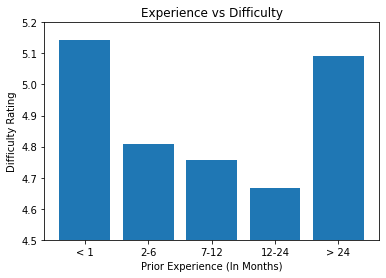

In [22]:
from data_utils import bojack 

horseman = bojack(data_int)
print(horseman)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(['< 1', '2-6', '7-12', '12-24', '> 24' ], [5.144, 4.808, 4.758, 4.666, 5.091])
ax.set_ylabel('Difficulty Rating')
ax.set_xlabel('Prior Experience (In Months)')
ax.set_title('Experience vs Difficulty')
plt.ylim([4.5, 5.2])  

# **Conclusion:**
While I was very much expecting to see that students who had taken the most computer science classes in the past, AKA the fives on the data set above, would have rated the class the easiest. Despite this inital bias however, I was shocked to find that both students who are completely new to computer science as well as students who have been practing coding for over 2 years are both equally frusturated by COMP 110's content. Suprisingly, the people who are apparently having the easiest time are those with 1 to 2 years experience. Funny how that works. 